In [23]:
from os import listdir
from os.path import isfile, join
files = [f for f in listdir('data') if isfile(join('data', f))]
print(files)

['2024-08i compl OADChi E2_02.tif', '2024-08i compl OADChi E2_03.tif', '2024-08i compl OADChi E2_05.tif', '2024-08i compl OADChi E2_08.tif', '2024-08i compl OADChi E2_09.tif', '2024-08i compl OADChi E2_10.tif', '2024-08i compl OADChi E2_12.tif', '2024-08i compl OADChi E2_13.tif', '2024-08i compl OADChi E2_14.tif', '2024-08i compl OADChi E2_15.tif', '2024-08i compl OADChi E2_16.tif', '2024-08i compl OADChi E2_17.tif', '2024-08i compl OADChi E2_18.tif', '2024-08i compl OADChi E2_19.tif', '2024-08i compl OADChi E2_22.tif', '2024-08i compl OADChi E2_23.tif', '2024-08i compl OADChi E2_24.tif', '2024-08i compl OADChi E2_26.tif', '2024-08i compl OADChi E2_27.tif', '2024-08i compl OADChi E2_30.tif', '2024-08i compl OADChi E2_31.tif', '2024-08i_compl_OADChi_E1_01.tif', '2024-08i_compl_OADChi_E1_03.tif', '2024-08i_compl_OADChi_E1_04.tif', '2024-08i_compl_OADChi_E1_05.tif', '2024-08i_compl_OADChi_E1_06.tif', '2024-08i_compl_OADChi_E1_07.tif', '2024-08i_compl_OADChi_E1_08.tif', '2024-08i_compl_OAD

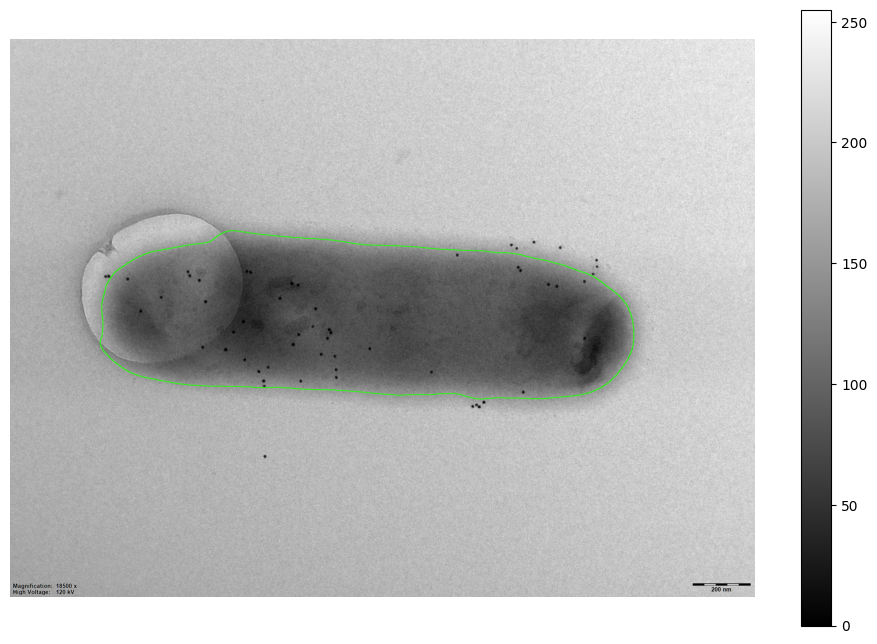

Cell surface area is: 854065.0


In [ ]:
import cv2

file = 'data\\2024-08i_compl_OADChi_E1_09.tif'

image = cv2.imread(file)
blur = cv2.medianBlur(image, 81)
gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)[1]

cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

min_area = 10
cells = []

for c in cnts:
    area = cv2.contourArea(c)
    if area > min_area:
        cv2.drawContours(image, [c], -1, (36, 255, 12), 2)  # Draw contours in green
        cells.append(c)


import numpy as np
import matplotlib.pyplot as plt

picture = np.array(image)
plt.figure(figsize=(12, 8))
plt.imshow(picture, cmap='gray')
plt.axis('off'); plt.axis('image'); plt.colorbar()
plt.show()


if len(cells) != 1:
    print(f'{len(cells)} cells found, only 1 cell is required')
else:
    print("Cell surface area is:", cv2.contourArea(cells[0]))
#cv2.imwrite("result2.jpg", image)


In [ ]:
import cv2
for file in files:
    file = 'data/'+file

    image = cv2.imread(file)
    blur = cv2.medianBlur(image, 81)
    gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)[1]

    cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]

    min_area = 10
    cells = []

    for c in cnts:
        area = cv2.contourArea(c)
        if area > min_area:
            cv2.drawContours(image, [c], -1, (36, 255, 12), 2)  # Draw contours in green
            cells.append(c)


    import numpy as np
    import matplotlib.pyplot as plt

    picture = np.array(image)
    plt.figure(figsize=(12, 8))
    plt.imshow(picture, cmap='gray')
    plt.axis('off'); plt.axis('image'); plt.colorbar()
    plt.show()


    if len(cells) != 1:
        print(f'{len(cells)} cells found, only 1 cell is required')
    else:
        print("Cell surface area is:", cv2.contourArea(cells[0]))
    #cv2.imwrite("result2.jpg", image)
